<b> Exploratory Data Analysis on film permits in New York </b>

By Dung (Alan) Nguyen


In this workbook, we are tasked to provide exploratory data analysis on movies filmed in New York. There a total of 52,350 permits broken down by start and end time film sessions, different film locations within New York, the different types of media genre and if the filming location was done within a police precinct. 

The analysis will identify what are the most popular filming locations, how long does it take to film, different categories genres impact the filming duration, which police precinct is most popular and other interesting points found within the dataset.  


In [21]:
#Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


In [22]:
#Load Data
df_film = pd.read_csv("film-permits.csv")


In [23]:
#Function code to show numerical in bargraph. 
#Code derrived from https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values/51535326#51535326
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


In [24]:
#To identify the duration of film, Clean and covert start and end time to datetime.

#Removing columns not required
df_film = df_film.drop(["ParkingHeld","CommunityBoard(s)","ZipCode(s)","EventAgency"], axis=1)

#Remove the T from start and end time
start_adj = df_film["StartDateTime"].replace(to_replace="T", value=" ", regex = True)
end_adj = df_film["EndDateTime"].replace(to_replace="T", value=" ", regex = True)

#Covert start and end time to datetime data type and convert to hours
duration = round(((pd.to_datetime(end_adj) - pd.to_datetime(start_adj)).dt.total_seconds() /3600),2)

#Creating two new df one for duration and the other for lead duration
df_film.insert(3,'Duration', duration)
df_film['PolicePrecinct(s)'] = df_film['PolicePrecinct(s)'].replace(np.nan,0)

<B> Durations analysis</B>

In [25]:
#Identifying the max and min of filming duration.
max_shooting_dur = df_film.iloc[df_film.Duration.idxmax()]
min_shooting_dur = df_film.iloc[df_film.Duration.idxmin()]

display(max_shooting_dur)
display(min_shooting_dur)


EventID                                      74427
EventType            Theater Load in and Load Outs
StartDateTime                  2012-10-28T06:00:00
Duration                                    3528.0
EndDateTime                    2013-03-24T06:00:00
EnteredOn                      2012-10-09T12:44:44
Borough                                   Manhatan
PolicePrecinct(s)                               20
Category                                   Theater
SubCategoryName                            Theater
Country                   United States of America
Name: 23050, dtype: object

EventID                                250877
EventType                     Shooting Permit
StartDateTime             2015-10-29T12:59:00
Duration                                 0.02
EndDateTime               2015-10-29T13:00:00
EnteredOn                 2015-10-28T10:37:46
Borough                              Manhatan
PolicePrecinct(s)                          10
Category                           Television
SubCategoryName                Not Applicable
Country              United States of America
Name: 17374, dtype: object

count    52350.00
mean        19.74
std         43.08
min          0.02
25%         13.00
50%         15.00
75%         16.50
max       3528.00
Name: Duration, dtype: float64

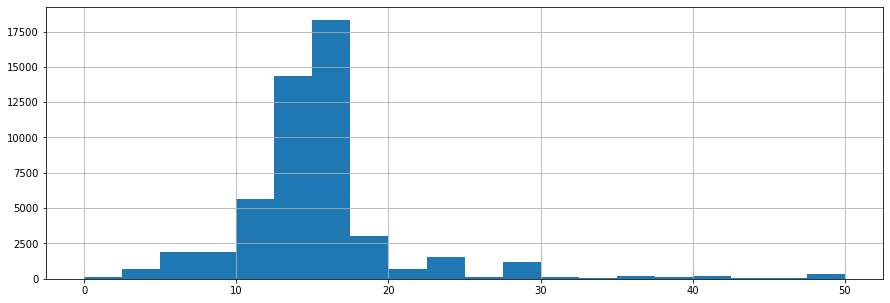

In [26]:
#Basic Duration Analyst
plt.figure(figsize = (15,5))
df_film.Duration.hist(bins =20, range=(0,50))
df_film.Duration.sort_values()
round(df_film.Duration.describe(),2)

Based on the data provided, we can identify that the longest filming duration was 3,528 hours (147 days) for a Theatre production filmed in Manhattan. On the other side of the spectrum the shortest filming permit was 0.02 hours (1 mins) for a Television show with no genre in Manhattan. This could be due a clerical error. The average filming permit duration is 19.7 hours. Based on the histogram majority of the film duration sits with in 10 to 20 hours. 

,min,max,mean,count
Category,,,,
Commercial,1.00,252.00,15.05,4391
Documentary,1.50,167.98,15.59,211
Film,1.00,692.48,15.34,9072
Music Video,1.50,74.00,15.40,166
Red Carpet/Premiere,17.98,17.98,17.98,1
Still Photography,0.50,205.00,14.00,3294
Student,2.00,96.00,10.86,341
Television,0.02,2488.00,17.54,28136
Theater,1.00,3528.00,50.76,4925


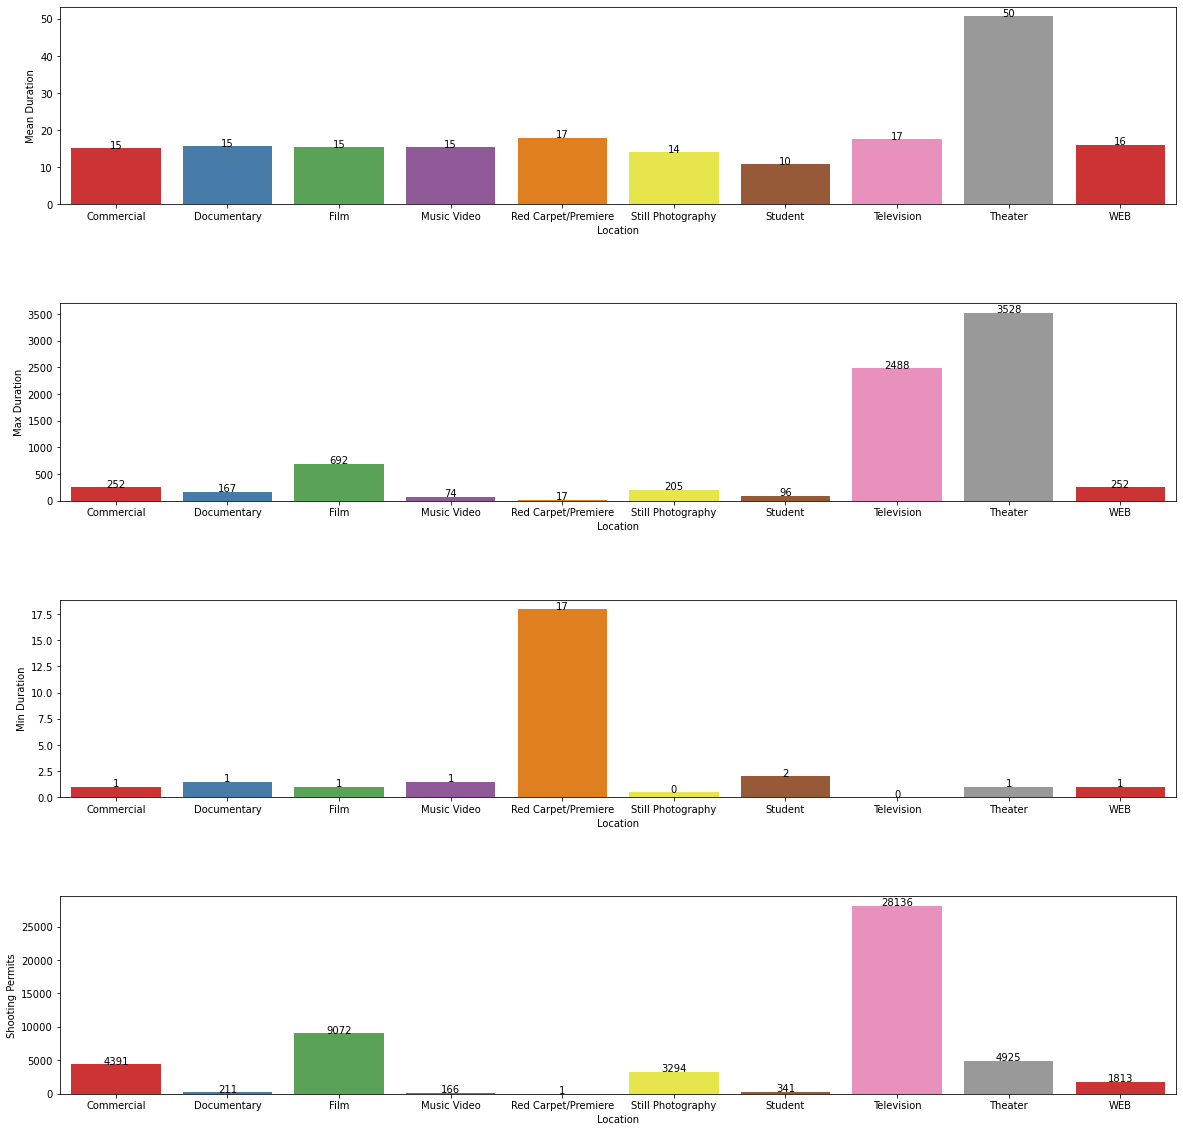

In [27]:
df_sp_summary = df_film.groupby(['Category']).agg(['min','max','mean','count'])
cat_sum = round(df_sp_summary.Duration,2)

fig, axs = plt.subplots(4,1, figsize=(20,20))
fig.subplots_adjust(hspace=.5)

barplot = sns.barplot(x=cat_sum.index, y='mean', data=cat_sum,palette="Set1",ax=axs[0])
barplot.set(xlabel='Location', ylabel='Mean Duration')
show_values_on_bars(barplot, "v", 0.3)

barplot_max = sns.barplot(x=cat_sum.index,y='max',data=cat_sum, palette="Set1",ax=axs[1])
barplot_max.set(xlabel='Location', ylabel='Max Duration')
show_values_on_bars(barplot_max, "v", 0.3)

barplot_min = sns.barplot(x=cat_sum.index,y='min',data=cat_sum, palette="Set1",ax=axs[2])
barplot_min.set(xlabel='Location', ylabel='Min Duration')
show_values_on_bars(barplot_min, "v", 0.3)

barplot_count = sns.barplot(x=cat_sum.index,y='count',data=cat_sum, palette="Set1",ax=axs[3])
barplot_count.set(xlabel='Location', ylabel='Shooting Permits')
show_values_on_bars(barplot_count, "v", 0.3)

cat_sum

Almost half of the shooting permits was Television which made up of 28,136 permits out of 53,350 permits. There was also 1 and the, only permit request for Red Carpet/Premiere event.  The longest shooting duration was Theater as mentioned above with 3,528 hours (147 days). The shortest shooting duration was television at or 0.2 hours, 1 min.

<B> Where's the most popular filming location in New York</B>

,min,max,mean,count
Borough,,,,
Bronx,2.00,270.98,16.13,1473
Brooklyn,0.98,929.00,16.26,15887
Manhatan,0.02,3528.00,23.32,26226
Queens,1.00,692.48,16.01,8104
Staten Island,2.00,197.98,15.34,660


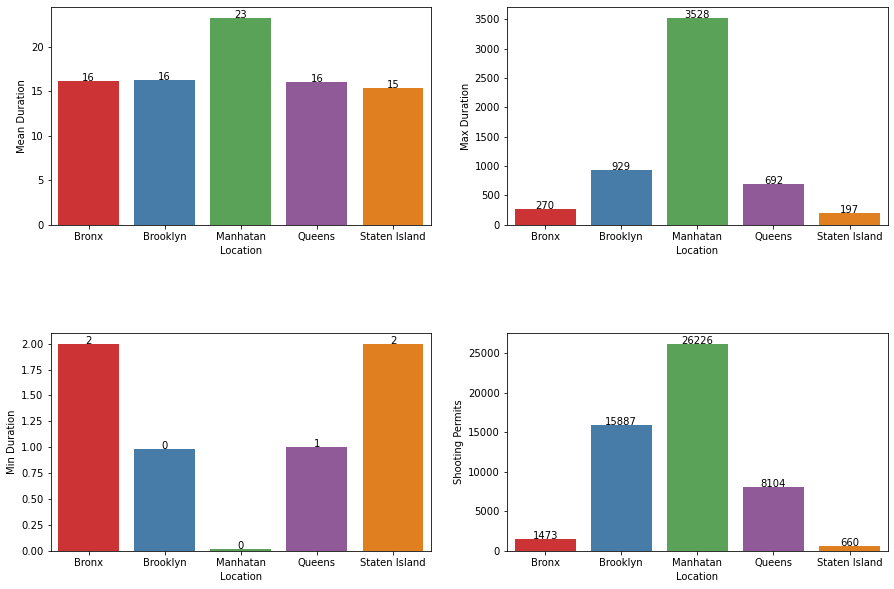

In [28]:
#Filtering the groups to Boroughs for analysis
df_sp_summary = df_film.groupby(['Borough']).agg(['min','max','mean','count'])
df_summary = round(df_sp_summary.Duration,2)


#using Seaborn to graph the breakdown of location data
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.subplots_adjust(hspace=.5)

barplot = sns.barplot(x=df_summary.index,y='mean',data=df_summary,palette="Set1", ax=axs[0,0])
barplot.set(xlabel='Location', ylabel='Mean Duration')
show_values_on_bars(barplot, "v", 1.5)

barplot_max = sns.barplot(x=df_summary.index,y='max',data=df_summary, palette="Set1",ax=axs[0,1])
barplot_max.set(xlabel='Location', ylabel='Max Duration')
show_values_on_bars(barplot_max, "v", 0.3)

barplot_min = sns.barplot(x=df_summary.index,y='min',data=df_summary, palette="Set1",ax=axs[1,0])
barplot_min.set(xlabel='Location', ylabel='Min Duration')
show_values_on_bars(barplot_min, "v", 0.3)

barplot_count = sns.barplot(x=df_summary.index,y='count',data=df_summary, palette="Set1",ax=axs[1,1])
barplot_count.set(xlabel='Location', ylabel='Shooting Permits')
show_values_on_bars(barplot_count, "v", 0.3)

df_summary

The most popular shooting location in New York is in Manhattan with a 26,226 shooting permits. It holds the longest shooting duration at 3,528 hours and shortest at 1 minute duration.

SubCategoryName
Magazine Show                 12
Daytime soap                  20
Syndication/First Run         44
Children                      75
Game show                     95
Cable-daily                  199
Talk Show                    284
Variety                      297
Special/Awards Show          337
Made for TV/mini-series      446
Morning Show                 526
Reality                      594
Cable-other                  610
Not Applicable               623
News                        1190
Pilot                       1474
Cable-episodic              5630
Episode series             15680
Name: EventType, dtype: int64

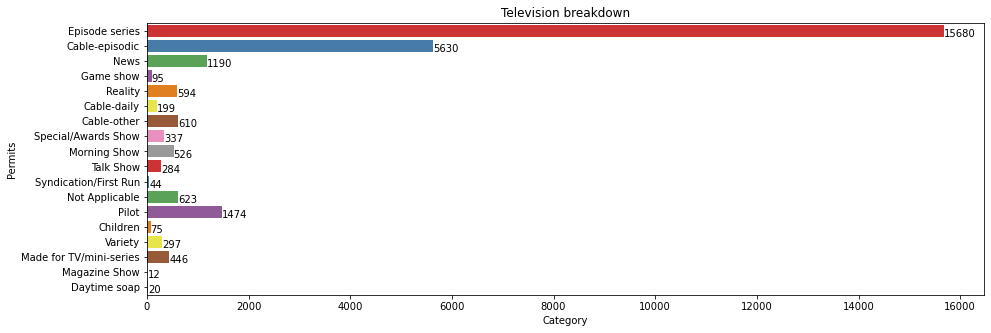

In [29]:
df_Television = df_film[df_film["Category"] == "Television"]
df_Television

plt.figure(figsize=(15,5))
barplot_count = sns.countplot(y='SubCategoryName',data=df_Television,palette="Set1")
barplot_count.set(xlabel='Category', ylabel='Permits',title="Television breakdown")
show_values_on_bars(barplot_count, "h", 0.3)

df_Television.groupby('SubCategoryName').EventType.count().sort_values()

The most requested permit for New York for Television at 28,136 permits, which is of the 52% of overall permits requested in the dataset. Ofthe 28,136 Television permits fell under the Episodes series at 15,680 follows by Cable-Episodic at 5,630. This could be due nature of the episodic tv shows, where multiple permits would be required to film a episodic tv series per season. The least popular television film permit was for Magazine Show at 12 permits.  

Country,Australia,Canada,France,Germany,Ireland,Japan,Netherlands,Panama,United Kingdom,United States of America
Category,,,,,,,,,,
Commercial,0,4,0,0,0,0,0,0,9,4378
Documentary,0,0,0,0,0,0,0,0,1,210
Film,0,1,1,0,2,0,3,7,0,9058
Music Video,0,0,0,0,0,0,0,0,0,166
Red Carpet/Premiere,0,0,0,0,0,0,0,0,0,1
Still Photography,1,0,0,0,0,0,0,0,3,3290
Student,0,0,6,0,0,0,0,0,0,335
Television,4,4,0,1,0,8,0,0,0,28119
Theater,0,0,0,0,0,0,0,0,0,4925


<Figure size 1080x360 with 0 Axes>

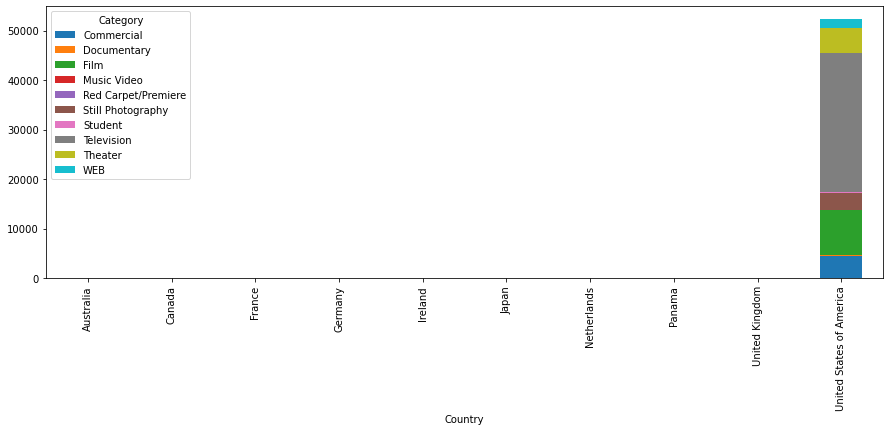

In [30]:
ct = pd.crosstab(df_film['Category'],df_film['Country'])
plt.figure(figsize=(15,5))
ct.T.plot.bar(stacked=True, figsize=(15,5))
ct

Based on the above table and the graph permits requested was the highest from USA. It makes more financial and logistical sense in media content within the origin country.

In [31]:
ct2 = pd.crosstab(df_film['Category'],df_film['Borough'])
ct2


Borough,Bronx,Brooklyn,Manhatan,Queens,Staten Island
Category,,,,,
Commercial,124,1272,2690,274,31
Documentary,10,51,137,12,1
Film,355,3212,4203,1089,213
Music Video,4,65,82,13,2
Red Carpet/Premiere,0,0,1,0,0
Still Photography,47,980,2147,118,2
Student,11,105,188,28,9
Television,893,8859,11645,6340,399
Theater,8,745,4162,9,1


<B> Which precinct will give you the highest probabiliy of running into a star, in the midst of filming? </B>

In [32]:
# Applicable Function to count Police Precinct overall
def total_prec(df):
    police_prec = {}
    for c in df['PolicePrecinct(s)']:
        c = str(c)
        List = c.split(', ')
        for i in List:
            if i in police_prec:
                police_prec[i]+=1
            else:
                police_prec[i] = 1
    return police_prec

#Converting precinct back into pandas
precinct = total_prec(df_film)
df_precinct_overall = pd.DataFrame(precinct.items(), columns=['Precinct','value'])

In [33]:
# Applicable Function to count Police Precinct into categories
def total_prec2(df):
    police_prec = []
    for c in df['PolicePrecinct(s)']:
        c = str(c)
        List = c.split(',')
        for i in List:
            i = int(i)
            police_prec.append(i)
    return police_prec

,Rank,Precinct(s),Freq
0,"Commercial, Precinct no.1",1,540
0,"Documentary, Precinct no.5",5,37
0,"Film, Precinct no.1",1,691
0,"Music Video, Precinct no.5",5,21
0,"Red Carpet/Premiere, Precinct no.10",10,1
0,"Still Photography, Precinct no.1",1,476
0,"Student, Precinct no.6",6,116
0,"Television, Precinct no.94",94,5441
0,"Theater, Precinct no.18",18,1554
0,"WEB, Precinct no.6",6,179


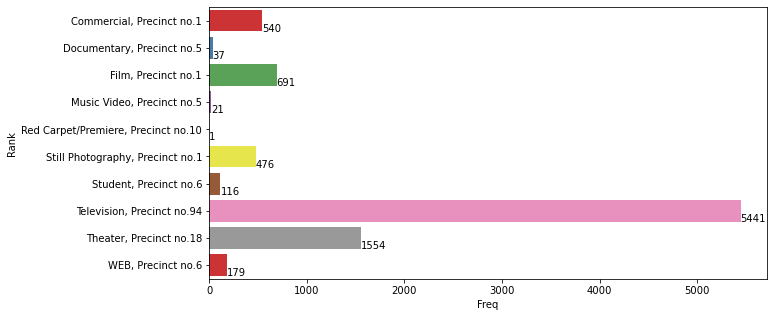

In [34]:
#Creating table to show what the most popular precinct and how many filming permits there are. 
df_precinct = df_film.groupby('Category').apply(total_prec2)

df_chart = pd.DataFrame(columns=['Rank','Precinct(s)', 'Freq'])

for each in df_precinct.index:
    adj_cat = pd.Series(df_precinct[each],name="Freq").value_counts(sort=True).head(1)
    adj_cat2 = adj_cat.index[0]
    adj_cat = adj_cat.rename_axis("Precinct(s)")
    
    adj_cat = adj_cat.reset_index()
    adj_cat['Rank']= each +', Precinct no.'+ str(adj_cat2)
    df_chart = df_chart.append(adj_cat)

#Replacing Nan with 0 then plaotting chart
df_chart['Freq'] = df_chart['Freq'].replace(to_replace=np.nan,value=0)
df_chart['Precinct(s)'] = df_chart['Precinct(s)'].replace(to_replace=np.nan,value=0)

plt.figure(figsize=(10,5))
barplot = sns.barplot(x='Freq',y='Rank',data=df_chart, palette="Set1")

show_values_on_bars(barplot, "h", 0.1)
df_chart

The most popular category that used Police Precinct was Television, with Police Precinct number 94 being approved with 5441 permits.

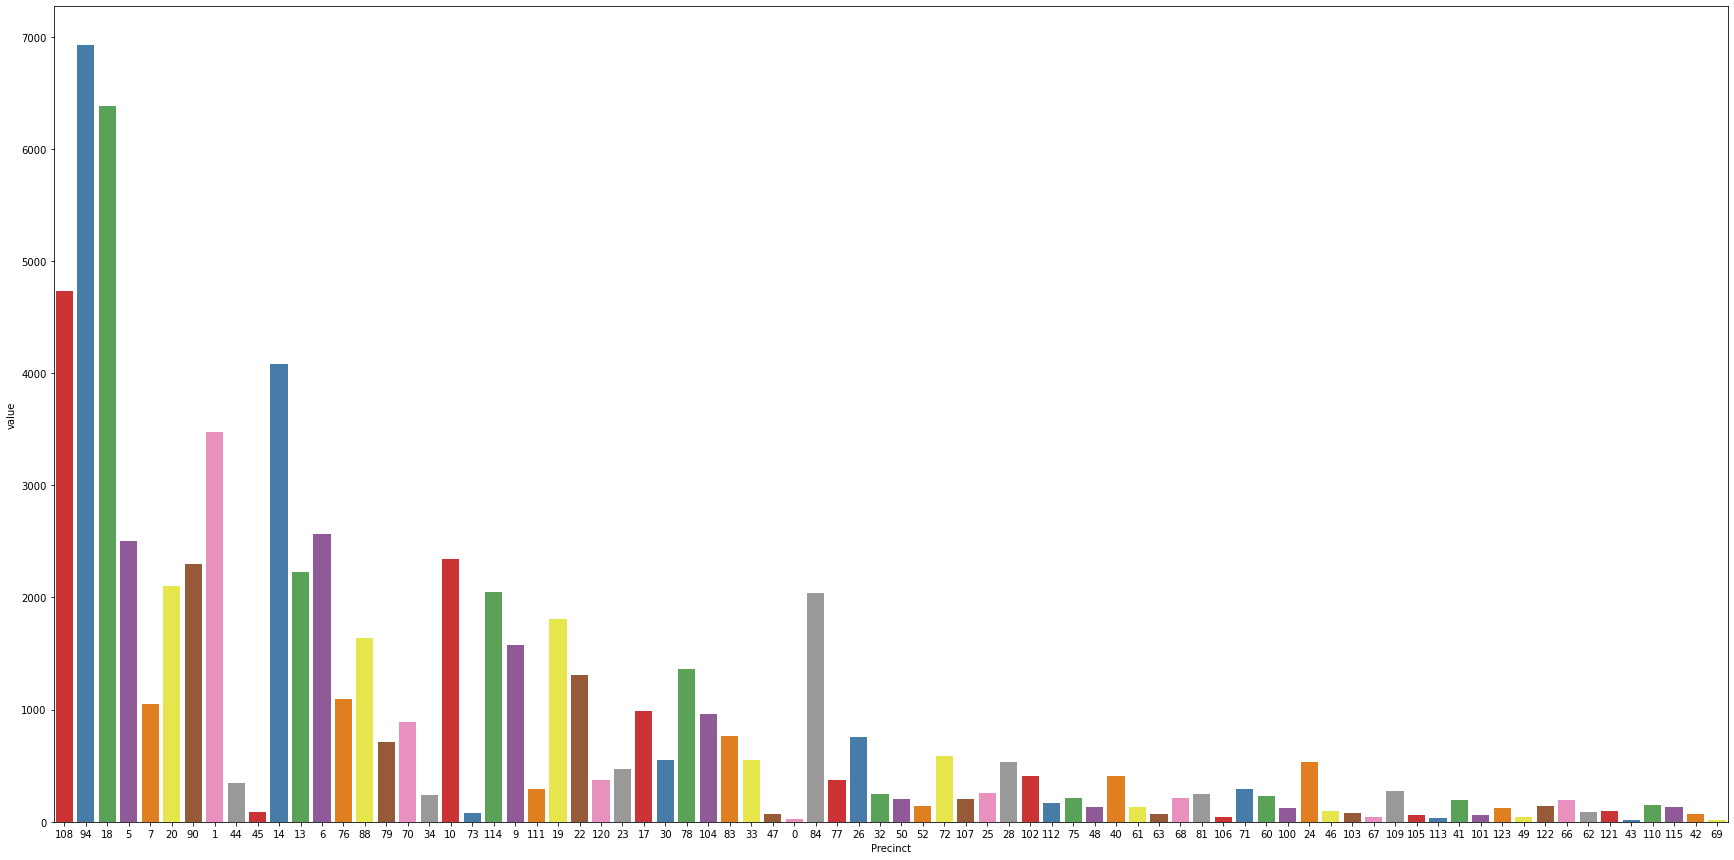

In [35]:
plt.figure(figsize=(30,15))
barplot_count = sns.barplot(y='value',x='Precinct',data=df_precinct_overall,palette="Set1")


In [36]:
#Identifying the overall best Precinct and worst
display(df_precinct_overall[df_precinct_overall['value']==df_precinct_overall['value'].max()])
display(df_precinct_overall[df_precinct_overall['value']==df_precinct_overall['value'].min()])



,Precinct,value
1,94,6924


,Precinct,value
77,69,15


The overall most popular precinct for film permits was Precinct 94, with 6924 permits. The least popular precinct was Precinct 69 with 15 film permits. 

<B> Which Borough is most organised? </B>

In [37]:
#Calulating the duration between EnteredDate and StartDate then adding to the main Dataframe
EnteredOn_adj = df_film["EnteredOn"].replace(to_replace="T", value=" ", regex = True)
lead_duration = round(((pd.to_datetime(start_adj) - pd.to_datetime(EnteredOn_adj)).dt.total_seconds() /3600),2)
df_film.insert(3,'LeadDuration', lead_duration)

count    52350.000000
mean       129.690151
std        177.719243
min        -27.440000
25%         49.560000
50%         90.360000
75%        136.760000
max       5754.190000
Name: LeadDuration, dtype: float64

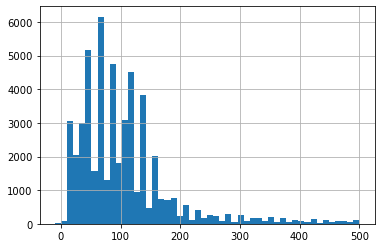

In [38]:
#Basic LeadDuration Analysis
df_film.LeadDuration.hist(bins =50, range=(-10,500))
df_film.LeadDuration.sort_values()
df_film.LeadDuration.describe()

The highest Lead Duration meaning the duration between the permit request date and the start of the filming date was 5,754 hours (239 days). The lowest on the other hand was negative. This could be due to multiples reasons such as permits being unorganised and lodged after filming, clerical error, retro adjustments.

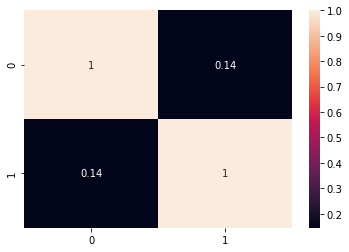

In [39]:
# Correlation Coefficent check to see to determine relationship
a = df_film['LeadDuration']
b = df_film['Duration']
r = np.corrcoef(a,b)
r
heatmap = sns.heatmap(r,annot=True)

Based on the correlation coefficient of 0.14, between the Lead Duration and the duration of the film permits, reflects a very weak correlation. There is no causation if the filming duration is longer, the earlier the permits need to be entered.

,min,max,mean,count
Borough,,,,
Bronx,3.34,611.52,96.52,1473
Brooklyn,-27.44,1407.83,110.07,15887
Manhatan,-17.82,5754.19,155.20,26226
Queens,-8.06,1531.05,95.15,8104
Staten Island,-7.51,759.87,86.47,660


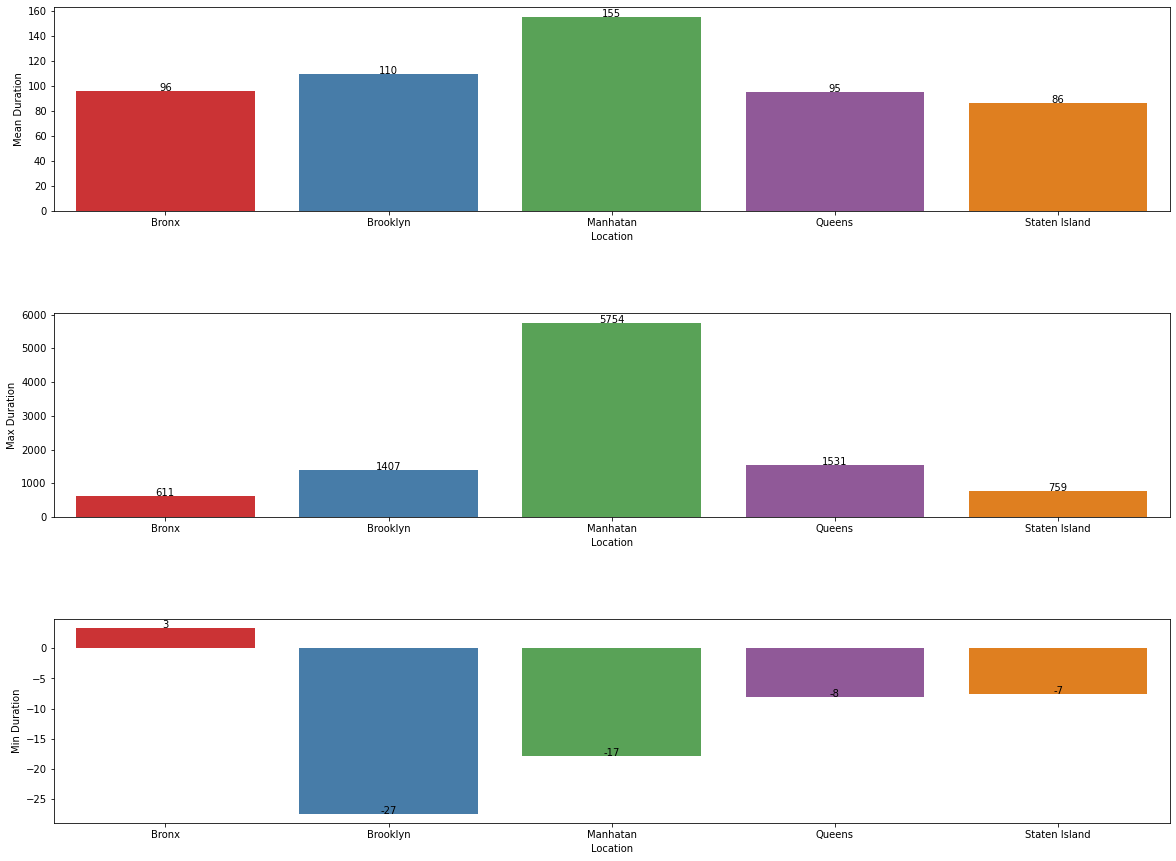

In [40]:
#Charts and Tables to provide descriptions on LeadDuration by location
fig, axs = plt.subplots(3,1, figsize=(20,15))
fig.subplots_adjust(hspace=.5)

df_film['LeadDuration'] = pd.to_numeric(df_film['LeadDuration'])
df_film_ld = round(df_film.groupby(['Borough']).LeadDuration.agg(['min','max','mean','count']),2)

barplot = sns.barplot(x=df_film_ld.index,y='mean',data=df_film_ld,palette="Set1", ax=axs[0])
barplot.set(xlabel='Location', ylabel='Mean Duration')
show_values_on_bars(barplot, "v", 1.5)

barplot_max = sns.barplot(x=df_film_ld.index,y='max',data=df_film_ld, palette="Set1",ax=axs[1])
barplot_max.set(xlabel='Location', ylabel='Max Duration')
show_values_on_bars(barplot_max, "v", 0.3)

barplot_min = sns.barplot(x=df_film_ld.index,y='min',data=df_film_ld, palette="Set1",ax=axs[2])
barplot_min.set(xlabel='Location', ylabel='Min Duration')
show_values_on_bars(barplot_min, "v", 0.3)

df_film_ld

Manhattan had was more organised in terms of getting their permit requests based on the mean Lead duration compare to the other Boroughs. Their average permit request time is just under a week with 155 hours before the schedule filming takes place. Staten Island leaves to the last with their average lead duration at 3.5 days. The earliest time requested for a permit was in Manhattan by 5754 hours which is 239 days as mentioned above. Interesting enough only Bronx didn't have any issues with requesting for permits, all their permits was done before the film commencement. While the others all had permits that had been approved post filming.

<B> Conclusion </B>

In conclusion the most active filming permits are coming from Manhattan, not only do they have the most permits for filming they are the most organise in submitting their approval request in advanced compare to other boroughs. Manhattan also has the highest average filming duration also the longest filming duration. Of all the categories Televisions is the most popular permit requested. The data also shows that precincts are popular with Television category, with precinct 94 being commonly requested for. The data skews heavily in favour for USA based permits requests being 99% of permits coming from USA, but this could be due to the cost factor of filming aboard vs filming locally.